In [39]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization, Embedding

import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

tf.__version__

'2.8.0'

## 1. Load data

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df)+len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


## 2. Visualize the data

In [7]:
rnd_idx = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][rnd_idx:rnd_idx+5].itertuples():
    _, text, target = row
    print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 0 (not real disaster)
Text:
Lee does comedy: ÛÏ@LeeJasper: Working class Tories prepare for your Armageddon. #InterestRateRiseÛ

---

Target: 0 (not real disaster)
Text:
@DrAtomic420 where did you get that pic from where it shows that there is 2 trophies for Outbreak? Or did they photoshop it?

---

Target: 1 (real disaster)
Text:
Watch The Terrifying Moment Two Giant Cranes Collapse Onto Homes: A row of homes was destroyed in seconds. http://t.co/G38Y8H1tJt

---

Target: 1 (real disaster)
Text:
West Nyack Pineview Road railroad crossing off Western Highway. Units on scene of a CSX Train vs. truck no injuries.

---

Target: 0 (not real disaster)
Text:
Live a balanced life! Balance your fear of #Allah with hope in His mercy and love for Him.

---



## 3. Split data into training and test splits

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size=0.1,
    random_state=42
)

In [9]:
len(X_train), len(y_train), len(X_test), len(y_test)

(6851, 6851, 762, 762)

In [10]:
X_train[:10], y_train[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## 4. Converting text into numbers

### `TextVectorization`

In [11]:
text_vectorizer = TextVectorization(
    max_tokens=None,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int", # map tokens to numbers
    output_sequence_length=None
)

2022-04-25 13:02:37.792756: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
round(sum([len(i.split()) for i in X_train])/len(X_train)) # average sentences length

15

In [13]:
# Custom variables
max_vocab_length = 30000
max_length = 15

text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode="int",
    output_sequence_length=max_length
)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [14]:
sample_sentence = "There is a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [15]:
rnd_tweet = random.choice(X_train)
print(f"Original text:\n{rnd_tweet}\\n\nVectorized version:")
text_vectorizer([rnd_tweet])

Original text:
Another entity forced to close in Montego Bay as a result of the collapsed sewer line #TVJNews\n
Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  165, 17699,  2107,     5,  1313,     4, 10708,  1551,    26,
            3,  1775,     6,     2,   439,  4656]])>

In [16]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 21056
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['010217', '010156', '0025', '001116', '0011']


### Embed our `TextVectorization` layers

In [17]:
tf.random.set_seed(42)

embedding = Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform", # default, initialize randomly
    input_length=max_length,
    name="embedding_layer"
)

In [18]:
rnd_tweet = random.choice(X_train)
print(f"Original text:\n{rnd_tweet}\\n\nEmbedded version:")
sample_embed = embedding(text_vectorizer([rnd_tweet]))
sample_embed

Original text:
FedEx no longer shipping bioterror germs - WXIA-TV | @scoopit http://t.co/ZQqJrQsbJm\n
Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04178156,  0.01266341,  0.00283604, ..., -0.04867874,
         -0.01714375,  0.04544358],
        [-0.04811442,  0.04142534,  0.00805675, ..., -0.04650271,
         -0.03631166, -0.00753704],
        [-0.00153303, -0.02941377, -0.00553651, ...,  0.01187601,
          0.02204753,  0.03154537],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

## 5. Modeling

### Model 0: Baseline

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using Tfidf
    ("clf", MultinomialNB())
])

model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
baseline_score = model_0.score(X_test, y_test)
print(f"Baseline accuracy: {baseline_score*100:.2f}%")

Baseline accuracy: 79.27%


In [21]:
baseline_preds = model_0.predict(X_test)
baseline_preds[:5]

array([1, 1, 1, 0, 0])

#### Evaluation function

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def model_metrics(y_true, y_pred):
    model_acc = accuracy_score(y_true, y_pred) * 100
    model_prec, model_rec, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {
        "accuracy": model_acc,
        "precision": model_prec,
        "recall": model_rec,
        "f1": model_f1
    }
    return model_results

In [23]:
baseline_results = model_metrics(y_test, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: Dense model

In [28]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

model_1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

In [29]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          3840000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,840,129
Trainable params: 3,840,129
N

In [30]:
model_1_history = model_1.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
214/215 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8715 - precision_1: 0.9811 - recall_1: 0.7124WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fefd93c47a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Li

In [31]:
model_1.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7940 - precision_1: 0.8351 - recall_1: 0.6839


[0.5051577687263489,
 0.7939632534980774,
 0.8350877165794373,
 0.6839080452919006]

In [33]:
# model_1.weights

In [35]:
embed_weights = model_1.get_layer("embedding_layer").get_weights()[0]
print(embed_weights.shape)

(30000, 128)


In [38]:
model_1_pred_probs = model_1.predict(X_test)
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_results = model_metrics(y_test, model_1_preds)
model_1_results

{'accuracy': 79.39632545931758,
 'precision': 0.7993947876674304,
 'recall': 0.7939632545931758,
 'f1': 0.7909943685590214}

In [40]:
# Is it better than our baseline?
np.array((list(model_1_results.values())) > np.array(list(baseline_results.values())))

array([ True, False,  True,  True])

In [41]:
def compare_baseline(baseline_results, new_model_results):
    for k, v in baseline_results.items():
        print(f"Baseline {k}: {v:.2f}, New {k}: {new_model_results[k]:.2f}, Difference: {new_model_results[k]-v:.2f}")

compare_baseline(baseline_results, model_1_results)

Baseline accuracy: 79.27, New accuracy: 79.40, Difference: 0.13
Baseline precision: 0.81, New precision: 0.80, Difference: -0.01
Baseline recall: 0.79, New recall: 0.79, Difference: 0.00
Baseline f1: 0.79, New f1: 0.79, Difference: 0.00


## 5. RNNs

### Model 2: LSTM

In [42]:
tf.random.set_seed(42)

model_2_embedding = Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_layer_2"
)

In [45]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

model_2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision()
    ]
)

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_layer_2 (Embeddin  (None, 15, 128)          3840000   
 g)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,889,473
Trainable params: 3,889,473
No

In [46]:
model_2_history = model_2.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
215/215 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.7468 - recall_2: 0.5446 - precision_2: 0.7976WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fefd9736d40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Li

In [48]:
model_2_pred_probs = model_2.predict(X_test)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_results = model_metrics(y_test, model_2_preds)
compare_baseline(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New precision: 0.76, Difference: -0.06
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


### Model 3: GRU

In [49]:
tf.random.set_seed(42)

model_3_embedding = Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_3_layer"
)

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

model_3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3_layer (Embeddin  (None, 15, 128)          3840000   
 g)                                                              
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,877,313
Trainable params: 3,877,313
Non

In [50]:
model_3_history = model_3.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
215/215 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.7303 - precision_3: 0.7988 - recall_3: 0.4916WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fefb61f83b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Li

In [51]:
model_3_pred_probs = model_3.predict(X_test)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_results = model_metrics(y_test, model_3_preds)
compare_baseline(baseline_results, model_3_results)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


### Model 4: Bidirectional RNN

In [52]:
tf.random.set_seed(42)

model_4_embedding = Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_4_layer"
)

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

model_4.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4_layer (Embeddin  (None, 15, 128)          3840000   
 g)                                                              
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                             

In [53]:
model_4_history = model_4.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test,y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
214/215 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.7490 - precision_4: 0.8048 - recall_4: 0.5433WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fefbdb31ef0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Li

In [54]:
model_4_pred_probs = model_4.predict(X_test)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_results = model_metrics(y_test, model_4_preds)
compare_baseline(baseline_results, model_4_results)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Baseline accuracy: 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New precision: 0.76, Difference: -0.06
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


### Model 5: Conv1D

In [61]:
tf.random.set_seed(42)

model_5_embedding = Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_5_layer"
)

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs)

model_5.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5_layer (Embeddin  (None, 15, 128)          3840000   
 g)                                                              
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d_7   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                           

In [62]:
model_5_history = model_5.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
214/215 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7266 - precision_5: 0.8120 - recall_5: 0.4673WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fefb5da7dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Li

In [63]:
model_5_pred_probs = model_5.predict(X_test)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_results = model_metrics(y_test, model_5_preds)
compare_baseline(baseline_results, model_5_results)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Baseline accuracy: 79.27, New accuracy: 75.85, Difference: -3.41
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


### Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [68]:
import tensorflow_hub as hub

In [69]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [71]:
embed_samples = embed([
    sample_sentence,
    "This sentence will be converted into numbers."
])
print(embed_samples[:10], embed_samples[0].shape)

tf.Tensor(
[[-0.01602834  0.01068851  0.02425467 ...  0.00800525  0.02877096
  -0.01427996]
 [ 0.04527503 -0.09327837 -0.0427916  ... -0.01835427  0.01900508
   0.0288168 ]], shape=(2, 512), dtype=float32) (512,)


In [73]:
sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE"
)

In [74]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

model_6.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision()
    ]
)

model_6.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_13 (Dense)            (None, 64)                32832     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_______________________________________________________________

In [75]:
model_6_history = model_6.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
214/215 [============================>.] - ETA: 0s - loss: 0.5008 - accuracy: 0.7893 - recall_6: 0.7206 - precision_6: 0.7705WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7feec8367200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
215/215 [==============================] - 6s 12ms/step - loss: 0.5008 - accuracy: 0.7892 - recall_6: 0.7205 - precision_6: 0.7706 - val_loss: 0.4478 - val_accuracy: 0.7966 - val_recall_6: 0.7672 - val_precision_6: 0.7830
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4144 - accuracy: 0.8133 - recall_6: 0.7530 - precision_6: 0.7980 - val_loss: 0.4369 - val_accuracy: 0.8058 - val_recall_6: 0.7644 - val_precision_6: 0.8012
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3998 - accuracy: 0.8212 - recall_6: 0.7496 - precision_6: 0.8163 - val_loss: 0.4329 - val_accuracy: 0.8110 - val_recall_6: 0.7672 - val_precision_6: 0.8091
Epoc

In [76]:
model_6_pred_probs = model_6.predict(X_test)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = model_metrics(y_test, model_6_preds)
compare_baseline(baseline_results, model_6_results)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Baseline accuracy: 79.27, New accuracy: 81.23, Difference: 1.97
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


### Model 7: TF Hub Pretrained USE 10% of the training data

One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

In [78]:
X_train_90_percent, X_train_10_percent, y_train_90_percent, y_train_10_percent = train_test_split(
    np.array(X_train),
    y_train,
    test_size=0.1,
    random_state=42
)
len(X_train), len(X_train_10_percent)

(6851, 686)

In [79]:
pd.Series(y_train_10_percent).value_counts()

0    415
1    271
dtype: int64

In [81]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_13 (Dense)            (None, 64)                32832     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [82]:
model_7_history = model_7.fit(
    X_train_10_percent,
    y_train_10_percent,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
20/22 [==========================>...] - ETA: 0s - loss: 0.6732 - accuracy: 0.6562 - precision_7: 0.5892 - recall_7: 0.4308WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fef217b65f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22/22 [==============================] - 6s 105ms/step - loss: 0.6716 - accuracy: 0.6574 - precision_7: 0.5928 - recall_7: 0.4244 - val_loss: 0.6526 - val_accuracy: 0.6903 - val_precision_7: 0.8684 - val_recall_7: 0.3793
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5972 - accuracy: 0.8032 - precision_7: 0.8908 - recall_7: 0.5720 - val_loss: 0.5944 - val_accuracy: 0.7362 - val_precision_7: 0.8326 - val_recall_7: 0.5287
Epoch 3/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5178 - accuracy: 0.8149 - precision_7: 0.8273 - recall_7: 0.6716 - val_loss: 0.5398 - val_accuracy: 0.7625 - val_precision_7: 0.8151 - val_recall_7: 0.6207
Epoch 4/

In [83]:
model_7_pred_probs = model_7.predict(X_test)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = model_metrics(y_test, model_7_preds)
compare_baseline(baseline_results, model_7_results)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.78, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


## 5. Comparing results

In [84]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,79.396325,0.799395,0.793963,0.790994
lstm,75.590551,0.755906,0.755906,0.755906
gru,77.821522,0.783377,0.778215,0.774864
bidirectional,75.590551,0.756062,0.755906,0.754451
conv1d,75.853018,0.758729,0.758530,0.757091
tf_hub_sentence_encoder,81.233596,0.814880,0.812336,0.810687
tf_hub_10_percent_data,77.034121,0.775563,0.770341,0.766706


In [85]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

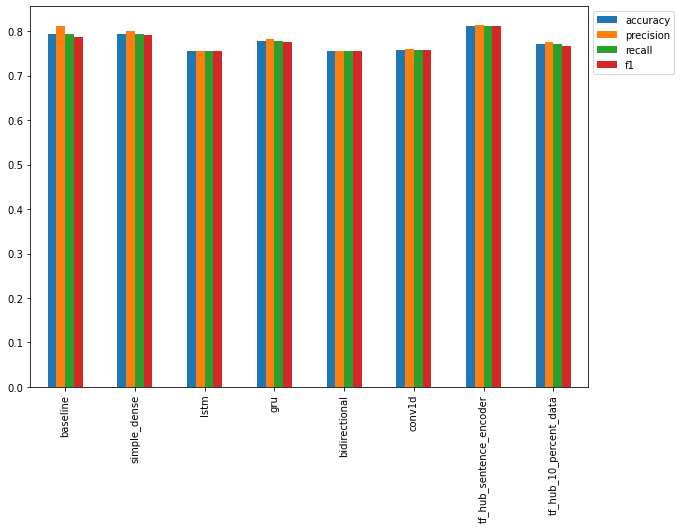

In [86]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

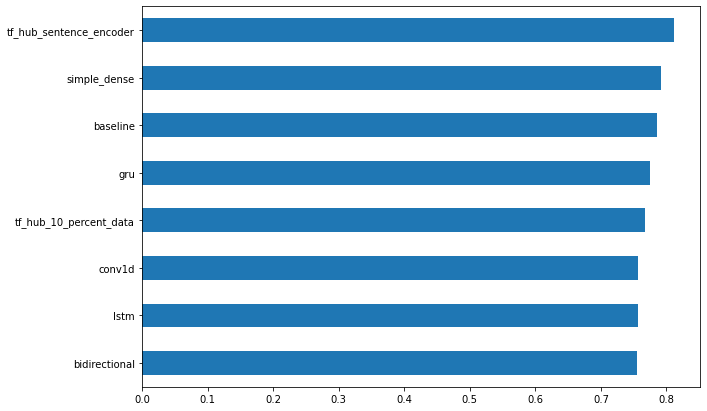

In [90]:
all_model_results.sort_values("f1", ascending=True)["f1"].plot(kind="barh", figsize=(10, 7));